# Graphs

### A graph data structure consists of a finite (and possibly mutable) set of vertices or nodes or points, together with a set of unordered pairs of these vertices for an undirected graph or a set of ordered pairs of directed graph

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Graph:
    
    def __init__(self):
        
        self.adjacency_dct = {}
        
    
    def add_vertex(self, vertex):
        """
        Method to add vertex. Acceppts a name of a vertex.
        Adds a key to adjacency list with the name of the vertex
        and sets its value to be an empty dictionary.
        """
        
        if not self.adjacency_dct.get(vertex): 
            self.adjacency_dct[vertex] = []
        
    
    def add_edge(self, vertex1, vertex2):
        """
        Method accepts two vertices. It finds in the adjacency list 
        the key of vertex1 and append vertex2 to the list and 
        vice versa
        """
        
        # check if both vertexes exist 
        if vertex1 in self.adjacency_dct and vertex2 in self.adjacency_dct:
            self.adjacency_dct[vertex1].append(vertex2)
            self.adjacency_dct[vertex2].append(vertex1)
            
    
    def remove_edge(self, vertex1, vertex2):
        """
        Method accepts two vertices. It reassign the key of vertex1
        to be a list that does not contain vertex2 and the key of
        vertex2 to be a list that does not contain vertex1
        """
        
        vertex1_edge = self.adjacency_dct.get(vertex1)
        vertex2_edge = self.adjacency_dct.get(vertex2)
        
        # check if both vertices exist 
        if vertex1_edge and vertex2_edge:
            # check if vertexes have edges
            if vertex2 in vertex1_edge and vertex1 in vertex2_edge:
                self.adjacency_dct[vertex1].remove(vertex2)
                self.adjacency_dct[vertex2].remove(vertex1)
                
                
    def remove_vertex(self, vertex):
        """
        Method accepts a vertex to remove.
        Method removes edges containing the vertex and then
        removes vertex
        """
            
        for adjacency_vertex in self.adjacency_dct.keys():
            self.remove_edge(vertex, adjacency_vertex)
        del self.adjacency_dct[vertex]
        
        
    def graph(self):
        
        """Builds graph """
        
        if not self.adjacency_dct:
            return None
        
        gr = nx.Graph()
        gr.add_nodes_from(self.adjacency_dct.keys())
        for vertex, edges in self.adjacency_dct.items():
            for edge in edges:
                gr.add_edge(vertex, edge)
        print("Nodes of graph: ", gr.nodes())
        nx.draw(gr, with_labels = True)
        plt.show()
        
    
    def depth_first_recursive(self, start_vertex):
        """
        Depth First Traversal Recursive. 
        Function accepts starting point
        """
        # list to store the end result, to be returned
        result = []
        # dct to sore visited vertices
        visited = {}
        
        def dfs(vertex):
            """
            Helper function which accepts a vertex and returns
            early if the vertex is empty
            """
            
            # place the vertex into visited dct
            visited[vertex] = True
            # append vertex to result
            result.append(vertex)
            # loop over the adjacency list for that vertex
            for edge in self.adjacency_dct[vertex]:
                # if any of edges have not been visited, 
                # recursively invoke the helper function with that edge 
                if not edge in visited:
                    dfs(edge)
            return vertex
        dfs(start_vertex)
        
        return result
    
    
    def depth_first_iterative(self, start_vertex):
        """
        Depth First Traversal Iterative. 
        Function accepts starting point
        """
        
        # stack to help use keep track of vertices
        stack = []
        # list to store end result
        result = []
        # dict to store visited vertices
        visited = {}
        # add the starting vertex to the stack
        stack.append(start_vertex)
        # while the stack has smth in it
        while stack:
            # pop the next vertex from the stack
            vertex = stack.pop()
            # if that vertex hasn't been visited yet
            if not vertex in visited:
                # mark it as visited
                visited[vertex] = True
                # add it to the result list
                result.append(vertex)
                # append all of it's neighbors into the stack
                stack.extend(self.adjacency_dct[vertex])
        
        return result
    
    
    def breadth_first(self, start_vertex):
        """
        Breadth First Traversal Iterative. 
        Function accepts starting point
        """
        
        # queue to help use keep track of vertices
        queue = []
        # list to store end result (visited nodes)
        result = []
        # dict to store visited vertices
        visited = {}
        # add the starting vertex to the queue
        queue.append(start_vertex)
        # mark the starting vertex as visited 
        visited[start_vertex] = True
        # while the queue has smth in it
        while queue:
            # remove the vertex from the queue
            vertex = queue.pop(0)
            # append it to the visited nodes list
            result.append(vertex)
            # loop over each vertex (neighbor) in the adjacency list for vertex
            for neighbor in self.adjacency_dct[vertex]:
                # if it was not visited
                if not neighbor in  visited:
                    # mark it as visited
                    visited[neighbor] = True
                    # enqueue it
                    queue.append(neighbor)
                
        
        return result
                
            
            

In [3]:
vertices = ['A', 'B', 'C', 'D', 'E', 'F']
edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'E'), ('D', 'E'), ('D', 'F'), ('E', 'F')]

In [4]:
g = Graph()

In [5]:
for vertex in vertices:
    g.add_vertex(vertex)

In [6]:
for edge in edges:
    g.add_edge(*edge)

In [7]:
g.adjacency_dct

{'A': ['B', 'C'],
 'B': ['A', 'D'],
 'C': ['A', 'E'],
 'D': ['B', 'E', 'F'],
 'E': ['C', 'D', 'F'],
 'F': ['D', 'E']}

Nodes of graph:  ['A', 'B', 'C', 'D', 'E', 'F']


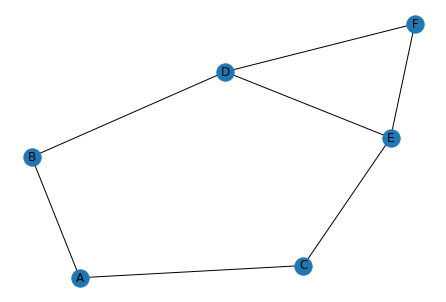

In [8]:
g.graph()

In [9]:
g.depth_first_recursive('A')

['A', 'B', 'D', 'E', 'C', 'F']

In [10]:
g.depth_first_iterative('A')

['A', 'C', 'E', 'F', 'D', 'B']

In [11]:
g.breadth_first('A')

['A', 'B', 'C', 'D', 'E', 'F']